<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 9** | Exercício 2

Aluno [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 11 de abril de 2024

---

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_RO = pd.read_csv('RO_2019.csv')
sinasc_RO.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_RO['faixa_latitude'] = pd.cut(sinasc_RO['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

In [5]:
# Realizar operações estatísticas usando groupby
operacoes = {
    'RACACORMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'LOCNASC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

resultado = sinasc_RO.groupby('faixa_latitude').agg(operacoes)

In [6]:
resultado

RACACORMAE                                                 \
                       sum      mean  min  max median       std       var   
faixa_latitude                                                              
Abaixo de -10.5    40382.0  3.169951  1.0  5.0    4.0  1.351861  1.827528   
Acima de -10.5     47501.0  3.485800  1.0  5.0    4.0  1.109650  1.231323   

                LOCNASC                                               
                    sum      mean min max median       std       var  
faixa_latitude                                                        
Abaixo de -10.5   13116  1.009467   1   4    1.0  0.145180  0.021077  
Acima de -10.5    14219  1.013182   1   4    1.0  0.175569  0.030825

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_RO['faixa_area'] = pd.cut(sinasc_RO['munResArea'], bins=[-float('inf'), -3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

In [8]:
# Realizar operações estatísticas usando groupby
operacoes = {
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

resultado = sinasc_RO.groupby('faixa_area').agg(operacoes)

In [9]:
resultado

QTDPARTNOR                                                \
                      sum     mean  min   max median       std      var   
faixa_area                                                                
Abaixo de 3000        0.0      NaN  NaN   NaN    NaN       NaN      NaN   
Acima de 3000     14571.0  0.57941  0.0  41.0    0.0  1.209157  1.46206   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
faixa_area                                                                 
Abaixo de 3000        0.0       NaN  NaN   NaN    NaN       NaN       NaN  
Acima de 3000     13136.0  0.520526  0.0  12.0    0.0  0.746337  0.557019

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_RO['faixa_variavel'] = pd.qcut(sinasc_RO['munResAlt'], q = 4, labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

In [11]:
# Realizar operações estatísticas usando groupby
operacoes = {
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

resultado = sinasc_RO.groupby('faixa_variavel').agg(operacoes)

In [12]:
resultado

CONSULTAS                                               \
                     sum      mean min max median       std       var   
faixa_variavel                                                          
Baixo              29285  3.337702   1   9    4.0  0.982834  0.965962   
Médio              17294  3.567244   1   9    4.0  0.740259  0.547984   
Alto               25991  3.746180   1   9    4.0  0.580052  0.336460   
Muito Alto         24092  3.725375   1   9    4.0  0.620341  0.384823   

               QTDGESTANT                                                  
                      sum      mean  min   max median       std       var  
faixa_variavel                                                             
Baixo             11258.0  1.453583  0.0  14.0    1.0  1.457187  2.123394  
Médio              6568.0  1.380412  0.0  52.0    1.0  1.715371  2.942496  
Alto               7790.0  1.128986  0.0  10.0    1.0  1.229511  1.511698  
Muito Alto         7300.0  1.138490  0.0  12.0    1.0  1.216856  1.480739

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
sinasc_1 = sinasc_RO[['IDADEMAE','munResNome']]
sinasc_1.head()

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste


In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}
imediatas

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Alto Paraíso': 'Ariquemes',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Governador Jorge Teixeira': 'Jaru',
 'Jaru': 'Jaru',
 "Machadinho d'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada d'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 "Alta Floresta d'Oeste": 'Cacoal',
 'Alt

<Axes: xlabel='regiões imediatas', ylabel='idade da mãe'>

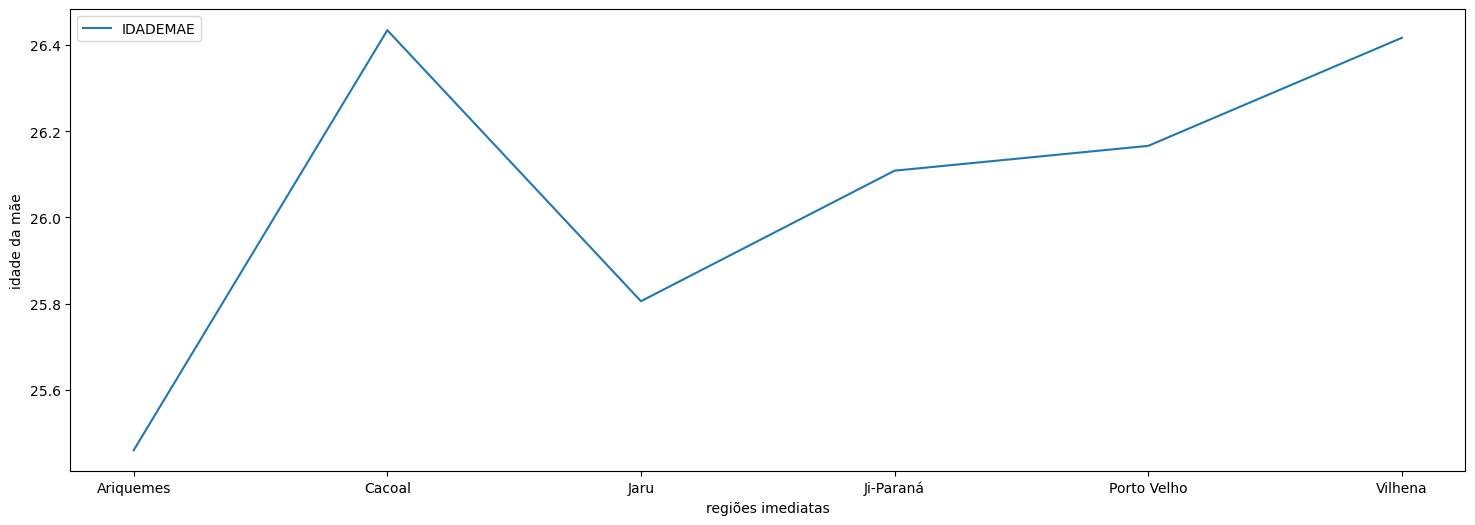

In [15]:
imediatas_idade_mae = sinasc_1.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade da mãe')
plt.xlabel('regiões imediatas')
imediatas_idade_mae

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
# carregando a base de dados contendo o IDH municipal
idh = pd.read_excel('IDH.xlsx')

In [21]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResNome  52 non-null     object 
 1   idh         52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 964.0+ bytes


In [22]:
# Setando a coluna munResNome como índice do dataframe
idh.set_index('munResNome', inplace=True)
idh

,idh
munResNome,
Porto Velho,0.736
Vilhena,0.731
Cacoal,0.718
Ji-Paraná,0.714
Pimenta Bueno,0.710
Ariquemes,0.702
Rolim de Moura,0.700
Cerejeiras,0.692
Jaru,0.689


In [23]:
# acrescentando a coluna IDH na base Sinasc_RO
sinasc_idh = sinasc_RO.set_index('munResNome').join(idh, how= 'outer')
sinasc_idh.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_variavel,idh
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,19.0,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,29.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,37.0,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,30.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,33.0,5.0,1 a 3 anos,621005.0,2.0,1.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN


In [24]:
sinasc_idh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27035 entries, Alta Floresta D'Oeste to Vilhena
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ORIGEM          27028 non-null  float64 
 1   CODESTAB        26913 non-null  float64 
 2   CODMUNNASC      27028 non-null  float64 
 3   LOCNASC         27028 non-null  float64 
 4   IDADEMAE        27028 non-null  float64 
 5   ESTCIVMAE       26711 non-null  float64 
 6   ESCMAE          26716 non-null  object  
 7   CODOCUPMAE      24121 non-null  float64 
 8   QTDFILVIVO      25455 non-null  float64 
 9   QTDFILMORT      24930 non-null  float64 
 10  CODMUNRES       27028 non-null  float64 
 11  GESTACAO        25796 non-null  object  
 12  GRAVIDEZ        26949 non-null  object  
 13  PARTO           26979 non-null  object  
 14  CONSULTAS       27028 non-null  float64 
 15  DTNASC          27028 non-null  object  
 16  HORANASC        27007 non-null  float64 


In [26]:
# Criando as faixas de agrupamento
sinasc_idh['faixa_idh'] = pd.cut(sinasc_idh['idh'], bins=[0, 0.5, 0.6, 0.7, 0.8, 1], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

In [27]:
# Excluindo as linhas NaN do IDH municipal
sinasc_idh.dropna(inplace= True, subset= 'idh')

In [29]:
# agrupando por faixa de idh e tirando a média
sinasc_idh.groupby('faixa_idh')[['CONSULTAS', 'QTDGESTANT']].mean()

,CONSULTAS,QTDGESTANT
faixa_idh,,
Muito Baixo,NaN,NaN
Baixo,3.632730,1.225211
Médio,3.663647,1.282685
Alto,3.518458,1.288139
Muito Alto,NaN,NaN


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [30]:
# carregando a base de dados contendo o IFDM municipal
ifdm = pd.read_excel('IFDM.xlsx')
ifdm.head()

,MUNICIPIO,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


In [31]:
# Setando a coluna municipio como indice do dataframe
ifdm.set_index('MUNICIPIO', inplace=True)

In [32]:
# acrescentando a coluna IFDM na base do Sinasc_RO
sinasc_ifdm = sinasc_RO.set_index('munResNome').join(ifdm, how= 'outer')

In [33]:
sinasc_ifdm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27035 entries, Alta Floresta D'Oeste to Vilhena
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ORIGEM          27028 non-null  float64 
 1   CODESTAB        26913 non-null  float64 
 2   CODMUNNASC      27028 non-null  float64 
 3   LOCNASC         27028 non-null  float64 
 4   IDADEMAE        27028 non-null  float64 
 5   ESTCIVMAE       26711 non-null  float64 
 6   ESCMAE          26716 non-null  object  
 7   CODOCUPMAE      24121 non-null  float64 
 8   QTDFILVIVO      25455 non-null  float64 
 9   QTDFILMORT      24930 non-null  float64 
 10  CODMUNRES       27028 non-null  float64 
 11  GESTACAO        25796 non-null  object  
 12  GRAVIDEZ        26949 non-null  object  
 13  PARTO           26979 non-null  object  
 14  CONSULTAS       27028 non-null  float64 
 15  DTNASC          27028 non-null  object  
 16  HORANASC        27007 non-null  float64 


In [34]:
# Criando as faixas de agrupamento
sinasc_ifdm['IFDM_descritiva'] = pd.cut(sinasc_ifdm['IFDM'], bins=[0, 0.4, 0.6, 0.8, float('inf')], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
sinasc_ifdm['IFDM_descritiva'].dropna().value_counts()

Moderado    21429
Regular      3669
Baixo           0
Alto            0
Name: IFDM_descritiva, dtype: int64

In [35]:
# Agrupando por faixa de IFDM e tirando a média
sinasc_ifdm.groupby('IFDM_descritiva')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
IFDM_descritiva,,,,
Baixo,NaN,NaN,NaN,NaN
Regular,0.264967,1.172404,25.412005,9.233004
Moderado,0.272476,1.030350,26.226921,9.184522
Alto,NaN,NaN,NaN,NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [46]:
# carregando a base de dados contendo o PIB municipal
pib = pd.read_excel('PIB.xlsx')

In [47]:
# Setando a coluna de municipio como indice
pib.set_index('munResNome', inplace=True)
pib.head()

,PIB
munResNome,
Porto Velho,17912070
Ji-Paraná,3783972
Vilhena,2831175
Ariquemes,2579830
Cacoal,2261644


In [49]:
# acrescentando a coluna PIB na base Sinasc_RO
sinasc_pib = sinasc_RO.set_index('munResNome').join(pib, how= 'outer')
sinasc_pib.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_variavel,PIB
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,19.0,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,29.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,37.0,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,30.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,33.0,5.0,1 a 3 anos,621005.0,2.0,1.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Muito Alto,NaN


In [50]:
sinasc_pib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27080 entries, Alta Floresta D'Oeste to  Vilhena
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ORIGEM          27028 non-null  float64 
 1   CODESTAB        26913 non-null  float64 
 2   CODMUNNASC      27028 non-null  float64 
 3   LOCNASC         27028 non-null  float64 
 4   IDADEMAE        27028 non-null  float64 
 5   ESTCIVMAE       26711 non-null  float64 
 6   ESCMAE          26716 non-null  object  
 7   CODOCUPMAE      24121 non-null  float64 
 8   QTDFILVIVO      25455 non-null  float64 
 9   QTDFILMORT      24930 non-null  float64 
 10  CODMUNRES       27028 non-null  float64 
 11  GESTACAO        25796 non-null  object  
 12  GRAVIDEZ        26949 non-null  object  
 13  PARTO           26979 non-null  object  
 14  CONSULTAS       27028 non-null  float64 
 15  DTNASC          27028 non-null  object  
 16  HORANASC        27007 non-null  float64 

In [51]:
# Criando as faixas de agrupamento
sinasc_pib['PIB_descritiva'] = pd.cut(sinasc_pib['PIB'], bins=[0, 100000, 200000, 300000, 500000, 1000000, float('inf')], labels=['Até 100 milhões', 'Acima de 100 milhões', 'Acima de 200 milhões', 'Acima de 300 milhões', 'Acima de 500 milhões', 'Acima de 1 bilhão'])
sinasc_pib['PIB_descritiva'].value_counts()

Acima de 100 milhões    16
Acima de 500 milhões     9
Até 100 milhões          8
Acima de 1 bilhão        8
Acima de 300 milhões     7
Acima de 200 milhões     4
Name: PIB_descritiva, dtype: int64

In [73]:
sinasc_pib.PIB_descritiva == 'Acima de 1 bilhão'

munResNome
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
                         ...  
 Theobroma               False
 Urupá                   False
 Vale do Anari           False
 Vale do Paraíso         False
 Vilhena                  True
Name: PIB_descritiva, Length: 27080, dtype: bool

In [77]:
sinasc_pib.PIB_descritiva == 'Acima de 100 milhões'

munResNome
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
Alta Floresta D'Oeste    False
                         ...  
 Theobroma                True
 Urupá                    True
 Vale do Anari            True
 Vale do Paraíso          True
 Vilhena                 False
Name: PIB_descritiva, Length: 27080, dtype: bool

In [74]:
# Agrupando por faixa de PIB e tirando a média
sinasc_pib.groupby('PIB_descritiva')[['ESCMAEAGR1', 'IDADEMAE', 'CONSULTAS', 'PESO']].mean()

,ESCMAEAGR1,IDADEMAE,CONSULTAS,PESO
PIB_descritiva,,,,
Até 100 milhões,NaN,NaN,NaN,NaN
Acima de 100 milhões,NaN,NaN,NaN,NaN
Acima de 200 milhões,NaN,NaN,NaN,NaN
Acima de 300 milhões,NaN,NaN,NaN,NaN
Acima de 500 milhões,NaN,NaN,NaN,NaN
Acima de 1 bilhão,NaN,NaN,NaN,NaN


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Identifiquei que o município Vale do Anari tem o IDH mais baixo do estado de Rondônia, entretanto possui o PIB acima de 100 milhões, levando em consideração que os municípios com os menores PIB são até 100 milhões.